__`Task 1`__

In [4]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import additionalplot_solution_1, additionalplot_solution_2

In [21]:
fuel_econ = pd.read_csv('./fuel-econ.csv')
fuel_econ.describe()
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


/tmp/ipykernel_152334/3537358246.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  make_means = fuel_econ_sub.groupby('make').mean()


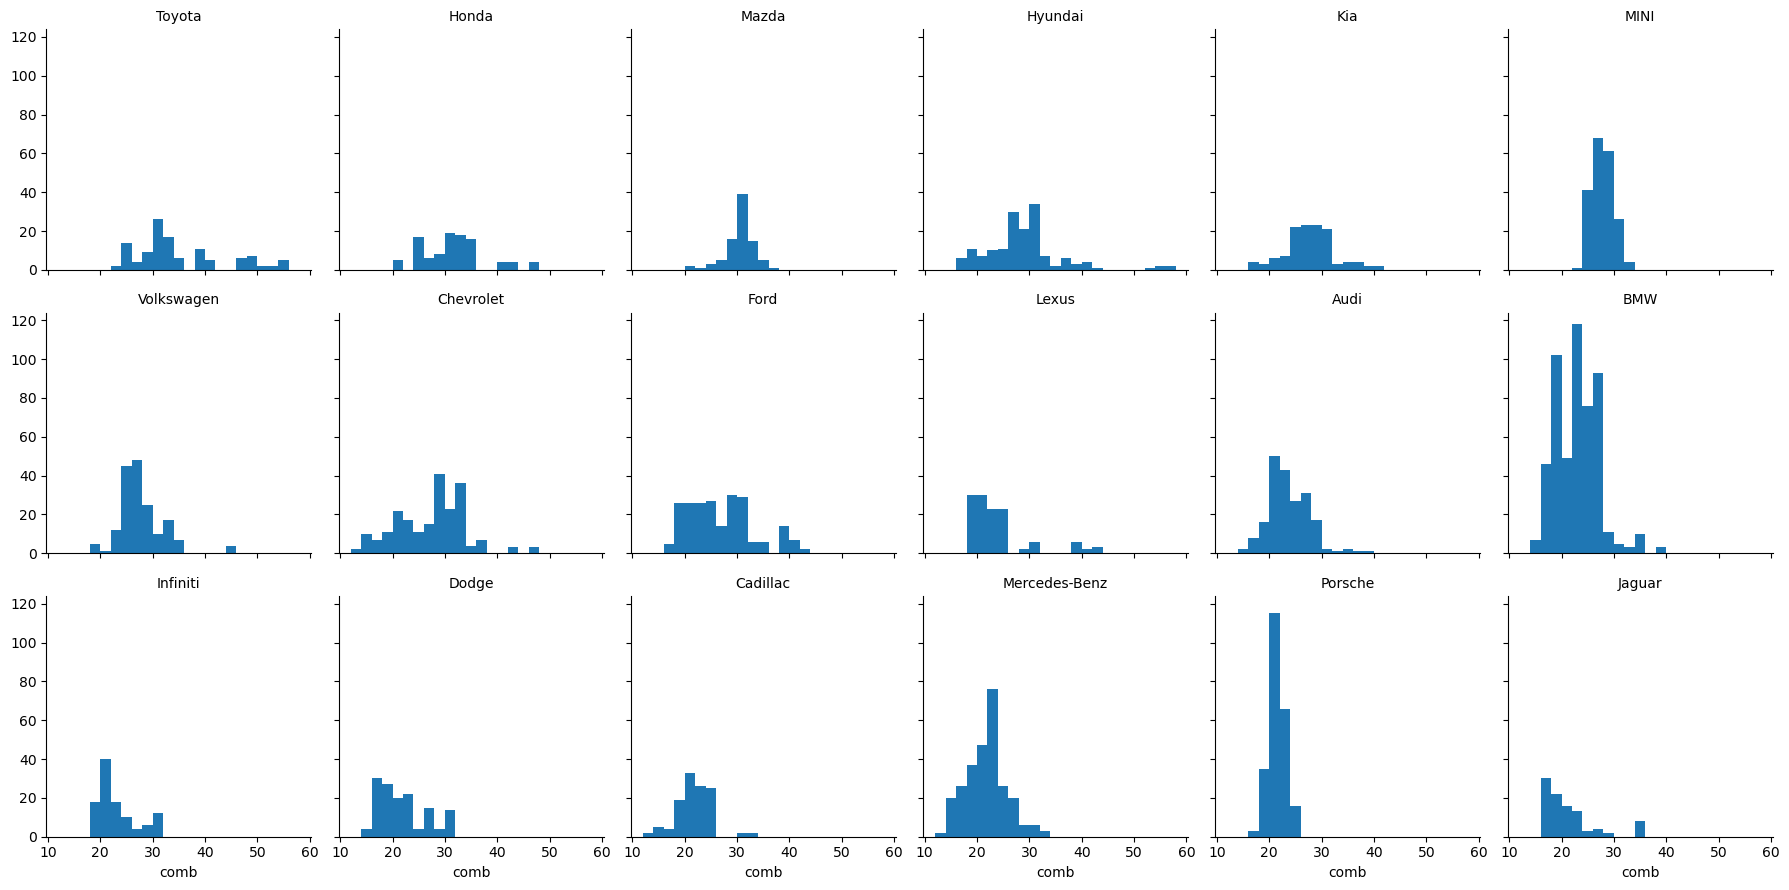

In [28]:
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)

most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending=False).index

g = sb.FacetGrid(data=fuel_econ_sub, col='make', col_wrap=6, col_order=comb_order)

g.map(plt.hist, 'comb', bins=np.arange(12, fuel_econ_sub['comb'].max()+2,2))
g.set_titles('{col_name}')

__`Task 2`__

Text(0.5, 0, 'Average Combined Fuel Eff. (mpg)')

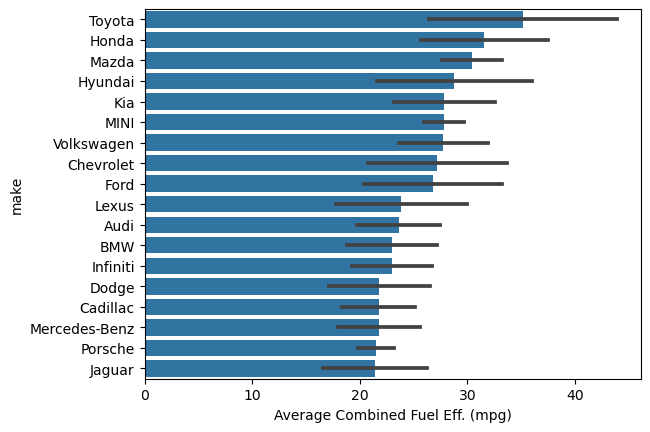

In [34]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ_sub, x='comb',y='make', color=base_color, order=comb_order, errorbar='sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)')